In [38]:
import gurobipy as gp
from gurobipy import Model, GRB, quicksum
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
dataC = pd.read_csv("customer.csv")
dataF = pd.read_csv("facility.csv")

In [40]:
xc = dataC['X'].tolist()
yc = dataC['Y'].tolist()
h  = dataC['Demand'].tolist()
n  = len(h)

In [41]:
xf = dataF['X'].tolist()
yf = dataF['Y'].tolist()
f  = dataF['Installation cost'].tolist()
m  = len(f)

In [50]:
I = [i for i in range(0,n)]
J = [j for j in range(0,m)]
A = [(i,j) for i in I for j in J]
p = 2

#Transportation cost is $1/mile
d = {(i,j): np.hypot(xc[i]-xf[j], yc[i]- yf[j]) for (i,j) in A}

In [43]:
#50 is the maximum covering distance

d = dict((k,v) for k,v in d.items() if v<=50)
d

{(0, 2): 23.430749027719962,
 (1, 1): 44.384682042344295,
 (2, 2): 29.832867780352597,
 (3, 2): 33.61547262794322,
 (5, 1): 31.144823004794873,
 (7, 0): 18.681541692269406,
 (8, 0): 3.0,
 (9, 2): 27.459060435491963}

In [44]:
#Maximum covering limit problem
mdl = Model('MCLP')

In [45]:
facilities, coverage = gp.multidict({0:[{7,8}], 1:[{1,5}], 2: [{0,2,3,9}]})
coverage

{0: {7, 8}, 1: {1, 5}, 2: {0, 2, 3, 9}}

In [46]:
x = mdl.addVars(J, vtype = GRB.BINARY)
z = mdl.addVars(I, vtype = GRB.BINARY)

In [52]:
mdl.setObjective(quicksum(h[i]*z[i] for i in I), GRB.MAXIMIZE)

In [53]:
mdl.addConstrs(quicksum(x[j] for j in J if i in coverage[j]) >= z[i] for i in I)
mdl.addConstr(quicksum(x[j] for j in J) == p)

<gurobi.Constr *Awaiting Model Update*>

In [55]:
mdl.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 52 rows, 13 columns and 96 nonzeros
Model fingerprint: 0x6883d436
Variable types: 0 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 8e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Found heuristic solution: objective 31.0000000
Presolve removed 52 rows and 13 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 1 (of 4 available processors)

Solution count 1: 31 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.100000000000e+01, best bound 3.100000000000e+01, gap 0.0000%


In [56]:
sol_x={j: x[j] for j in J}
sol_x

{0: <gurobi.Var C0 (value 0.0)>,
 1: <gurobi.Var C1 (value 1.0)>,
 2: <gurobi.Var C2 (value 1.0)>}

In [57]:
sol_z={i: z[i] for i in I}
sol_z

{0: <gurobi.Var C3 (value 1.0)>,
 1: <gurobi.Var C4 (value 1.0)>,
 2: <gurobi.Var C5 (value 1.0)>,
 3: <gurobi.Var C6 (value 1.0)>,
 4: <gurobi.Var C7 (value 0.0)>,
 5: <gurobi.Var C8 (value 1.0)>,
 6: <gurobi.Var C9 (value 0.0)>,
 7: <gurobi.Var C10 (value 0.0)>,
 8: <gurobi.Var C11 (value 0.0)>,
 9: <gurobi.Var C12 (value 1.0)>}

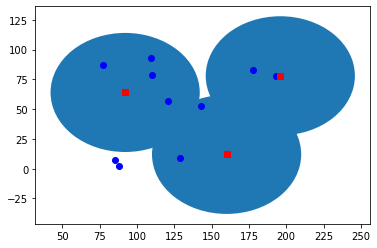

In [58]:
cir1=plt.Circle((xf[0],yf[0]), radius=50, zorder=0)
cir2=plt.Circle((xf[1],yf[1]), radius=50, zorder=0)
cir3=plt.Circle((xf[2],yf[2]), radius=50, zorder=0)
fig, ax=plt.subplots()
ax.add_patch(cir1)
ax.add_patch(cir2)
ax.add_patch(cir3)
plt.scatter(xc,yc,c='b')
plt.scatter(xf,yf,c='r',marker='s')